In [98]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(rc={'figure.figsize':(16,9)}, style='whitegrid')

In [99]:
# Импортируем оба датасета

tel = pd.read_parquet('telemetry.parquet', engine='pyarrow')
wth = pd.read_parquet('weather_hourly.parquet', engine='pyarrow')

In [100]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426322 entries, 0 to 426321
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype                                
---  ------                --------------   -----                                
 0   objectid              426322 non-null  int64                                
 1   time                  426322 non-null  datetime64[us, pytz.FixedOffset(420)]
 2   lat                   426322 non-null  float64                              
 3   lon                   426322 non-null  float64                              
 4   speed                 426322 non-null  float64                              
 5   height                426322 non-null  float64                              
 6   fuel_cons             426322 non-null  float64                              
 7   engine_speed          259203 non-null  float64                              
 8   hdop                  426322 non-null  float64                  

In [101]:
tel.describe()

,objectid,lat,lon,speed,height,fuel_cons,engine_speed,hdop,DQ_vertical_bump,accelerator_position,fuel_tank_level,weight_dynamic,tripid,weight,driverid,w_fl,x,y
count,426322.000000,426322.000000,426322.000000,426322.000000,426322.000000,426322.000000,259203.000000,426322.000000,426322.0,426322.0,167118.000000,167119.000000,4.253670e+05,425367.000000,425367.000000,426322.000000,426322.000000,4.263220e+05
mean,1123.811115,63.334951,83.741407,13.190398,190.954827,100.786711,1099.331509,23.995118,0.0,0.0,47.944135,96.086106,1.003731e+06,213.705264,2890.882269,0.455069,637310.774179,7.025849e+06
std,1.728688,0.306873,0.406129,12.541732,123.947698,128.811076,354.426768,36.951528,0.0,0.0,14.930978,103.151354,6.050815e+01,6.899292,11.518725,0.497978,3259.147072,3.404231e+04
min,1121.000000,0.000000,0.000000,0.000000,-433.400000,0.000000,0.000000,0.610000,0.0,0.0,12.000000,0.000000,1.003626e+06,195.000000,2875.000000,0.000000,0.000000,0.000000e+00
25%,1123.000000,63.334432,83.727788,0.529672,130.300000,17.000000,977.000000,6.000000,0.0,0.0,36.000000,0.000000,1.003678e+06,210.000000,2878.000000,0.000000,636595.910597,7.025806e+06
50%,1124.000000,63.337024,83.750318,11.497200,255.000000,35.350000,1124.750000,7.000000,0.0,0.0,47.000000,2.000000,1.003731e+06,214.000000,2889.000000,0.000000,637670.310177,7.026094e+06
75%,1125.000000,63.341972,83.755314,24.400000,271.000000,145.900000,1293.000000,10.000000,0.0,0.0,59.000000,210.000000,1.003780e+06,219.000000,2902.000000,1.000000,637887.903113,7.026659e+06
max,1126.000000,63.350544,83.789288,50.500000,332.000000,441.900000,1874.000000,99.990000,0.0,0.0,100.000000,249.000000,1.003841e+06,231.000000,2909.000000,1.000000,639639.257576,7.027611e+06


In [102]:
# NaNы под замену

tel.isna().sum()

objectid                     0
time                         0
lat                          0
lon                          0
speed                        0
height                       0
fuel_cons                    0
engine_speed            167119
hdop                         0
DQ_vertical_bump             0
accelerator_position         0
fuel_tank_level         259204
weight_dynamic          259203
tripid                     955
weight                     955
driverid                   955
w_fl                         0
x                            0
y                            0
dtype: int64

In [155]:
tel.head()

,objectid,time,lat,lon,speed,height,fuel_cons,engine_speed,hdop,DQ_vertical_bump,accelerator_position,fuel_tank_level,weight_dynamic,tripid,weight,driverid,w_fl,x,y
0,1121,2023-11-08 05:31:31.309000+07:00,63.328824,83.727988,3.00394,195.7,390.00,NaN,99.99,0,0,60.0,216.0,1003671.0,215.0,2891.0,1,636592.202274,7.025133e+06
1,1125,2023-11-08 03:21:39+07:00,63.334962,83.751046,0.00000,280.0,0.00,0.000,8.00,0,0,NaN,NaN,1003657.0,216.0,2887.0,0,637716.857273,7.025866e+06
2,1124,2023-11-08 19:20:55+07:00,63.343592,83.739678,4.20000,228.0,66.85,778.000,5.00,0,0,NaN,NaN,1003798.0,217.0,2875.0,0,637106.943106,7.026803e+06
3,1124,2023-11-08 14:16:39+07:00,63.343290,83.751773,16.80000,278.0,2.45,743.375,6.00,0,0,NaN,NaN,1003749.0,209.0,2875.0,0,637713.403209,7.026795e+06
4,1121,2023-11-08 11:09:49.347000+07:00,63.331924,83.765388,0.00000,70.9,17.00,NaN,99.99,0,0,38.0,0.0,1003728.0,204.0,2894.0,0,638449.084136,7.025559e+06


In [166]:
# Уникальные машины

tel['objectid'].unique()

# От 1121 до 1126

array([1121, 1125, 1124, 1126, 1123, 1122], dtype=int64)

In [203]:
# Убираем очевидные выбросы не из 3-сигма интервала, округляем координаты, убираем дубликаты

tel1 = tel[(np.abs(stats.zscore(tel['lat'])) < 3)]
tel2 = tel1[(np.abs(stats.zscore(tel1['lon'])) < 3)]
new_coord_rounded = tel2[['objectid','x','y']].drop_duplicates().round(1)
new_coord_rounded.head()

,objectid,x,y
0,1121,636592.2,7025133.2
1,1125,637716.9,7025866.0
2,1124,637106.9,7026802.5
3,1124,637713.4,7026794.8
4,1121,638449.1,7025558.6


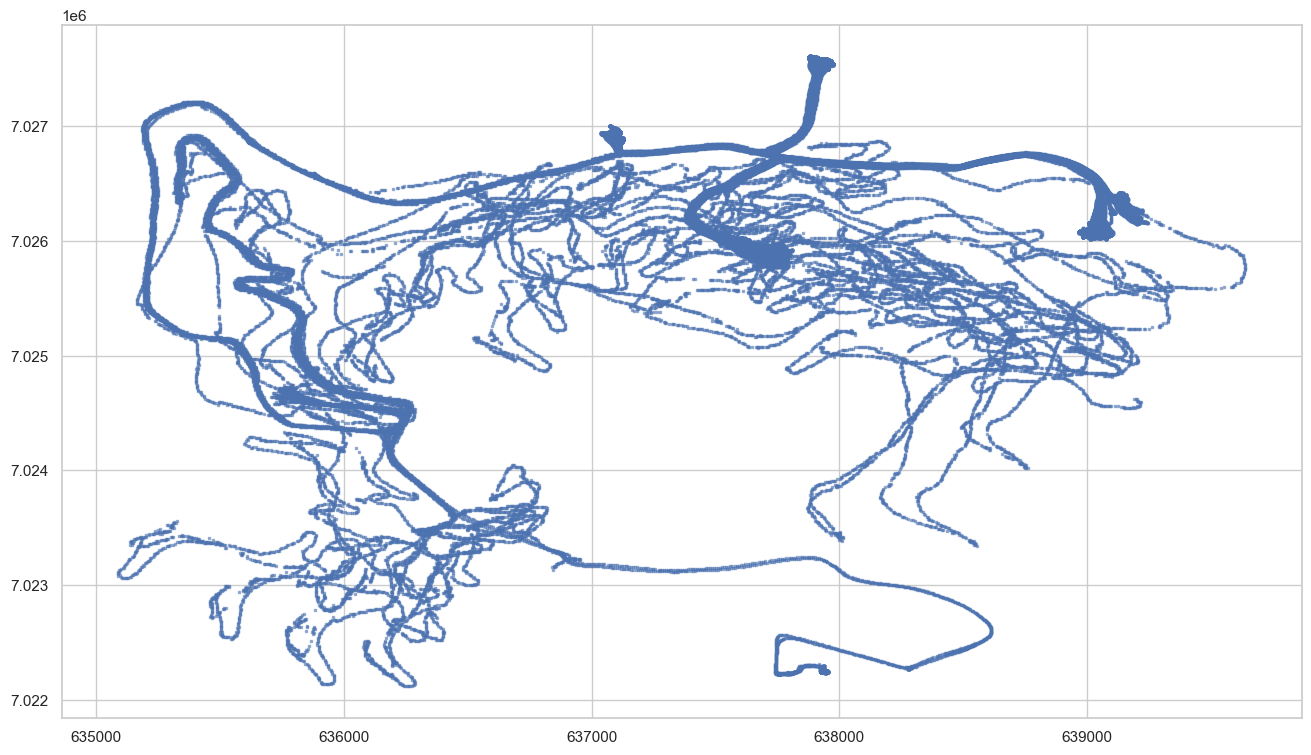

In [170]:
# Проверочный график по общим координатам (каждая 16 строка - коммент)

# p = plt.scatter(new_coord_rounded.iloc[::16].x, new_coord_rounded.iloc[::16].y, alpha=0.5, marker=",", s=5)

plt.scatter(x=new_coord_rounded.x, y=new_coord_rounded.y, marker=",", s=1, alpha=0.5)

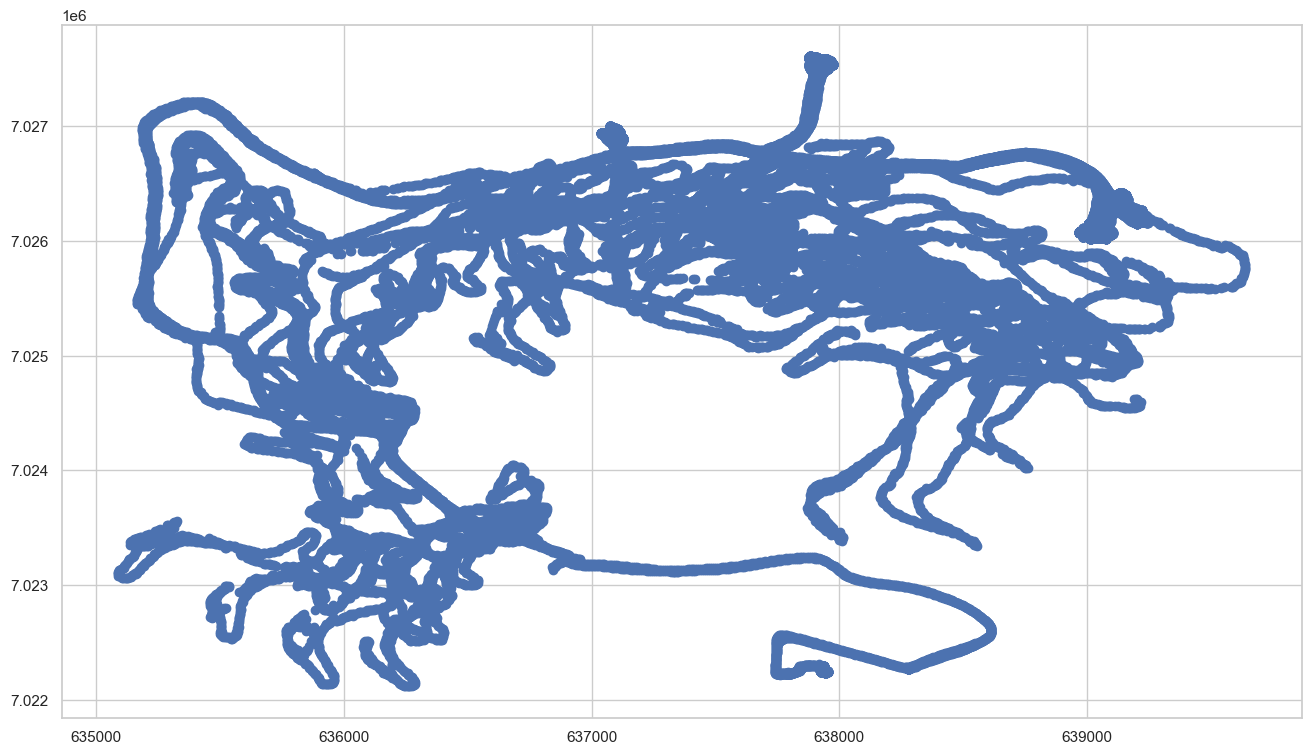

In [107]:
# Уменьшаем количество точек

df = new_coord_rounded
lin_x = np.linspace(df.x.min(), df.x.max(), num = 150, endpoint=False)
lin_y = np.linspace(df.y.min(), df.y.max(), num = 150, endpoint=False)
map_coord = pd.DataFrame(columns=['x','y'])
n = 0
for i in range(len(lin_x)-1):
    for j in range(len(lin_y)-1):
        count = len(df[((df.x > lin_x[i]) & (df.x < lin_x[i+1])) & ((df.y > lin_y[j]) & (df.y < lin_y[j+1]))].index)
        if count > 5:
            map_coord.loc[n, ['x','y']] = lin_x[i] + (lin_x[i+1] - lin_x[i]) / 2, lin_y[j] + (lin_y[j+1] - lin_y[j]) / 2
            n += 1

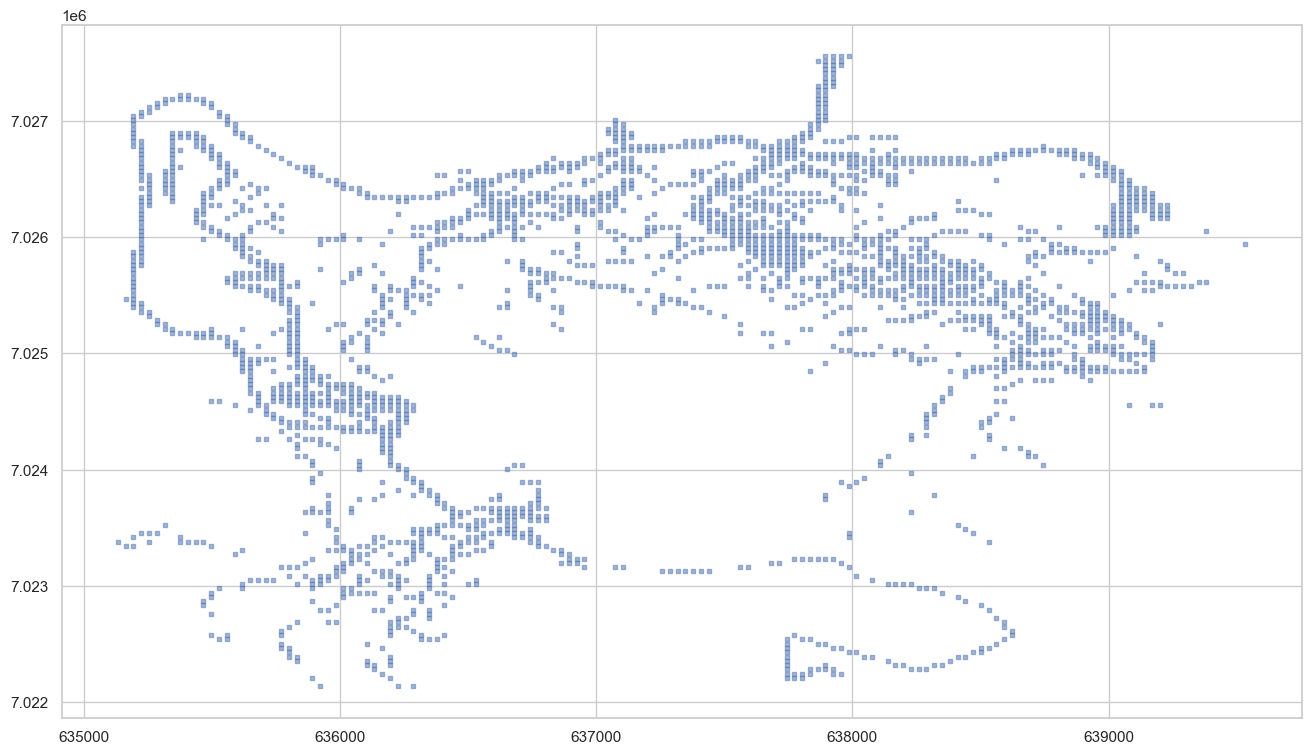

In [190]:
# Выводим обновленный плот, ошибочные маршруты частично пропали, остались в виде отдельных точек

plt.scatter(x=map_coord.x, y=map_coord.y, marker=",", s=10, alpha=0.5)

In [222]:
obj_id_sorted = new_coord_rounded.sort_values('objectid', ascending=True)['objectid'].unique()

obj_id_sorted

array([1121, 1122, 1123, 1124, 1125, 1126], dtype=int64)

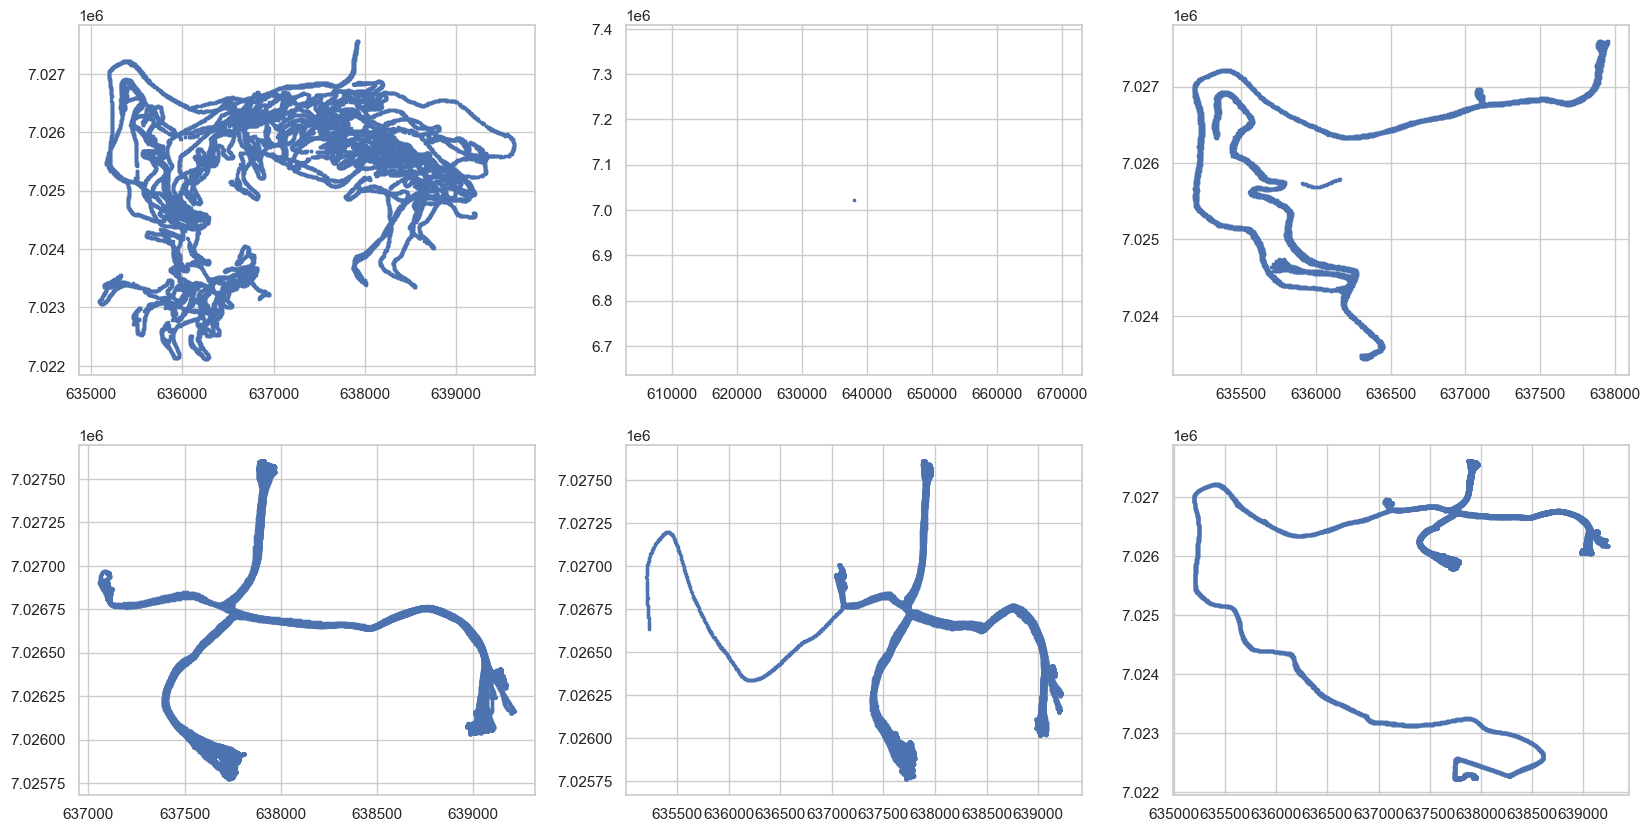

In [231]:
# Делаем плоты по каждой машине

n = 1121 # Номер машины
fig = plt.figure(figsize=(20, 10))
for item in obj_id_sorted:
    fig.add_subplot(2, 3, item-1120)
    plt.scatter(x=new_coord_rounded[new_coord_rounded['objectid'] == item].x, y=new_coord_rounded[new_coord_rounded['objectid'] == item].y, marker=",", s=1)

In [ ]:
# ВЫВОДЫ: